In [308]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
import pandas as pd


In [234]:
test_dir = './Splitted Data/testData/'
train_dir = './Splitted Data/trainData'

In [238]:
my_data_dir = './Splitted Data'

In [246]:
test_path = my_data_dir+'/testData'
train_path = my_data_dir+'/trainData'

In [244]:
os.listdir(test_path)

['Class 1', 'Class 2']

In [247]:
os.listdir(train_path)

['Class 1', 'Class 2']

In [262]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        print(filename)
        if img is not None:
            
            images.append(img)
    return images

train_uninfected = load_images_from_folder(f'{train_path}/Class 1')
train_parasited = load_images_from_folder(f'{train_path}/Class 2')

C100P61ThinF_IMG_20150918_144104_cell_128.png
C100P61ThinF_IMG_20150918_144104_cell_131.png
C100P61ThinF_IMG_20150918_144104_cell_144.png
C100P61ThinF_IMG_20150918_144104_cell_21.png
C100P61ThinF_IMG_20150918_144104_cell_25.png
C100P61ThinF_IMG_20150918_144104_cell_34.png
C100P61ThinF_IMG_20150918_144104_cell_48.png
C100P61ThinF_IMG_20150918_144104_cell_65.png
C100P61ThinF_IMG_20150918_144348_cell_120.png
C100P61ThinF_IMG_20150918_144348_cell_125.png
C100P61ThinF_IMG_20150918_144348_cell_131.png
C100P61ThinF_IMG_20150918_144348_cell_2.png
C100P61ThinF_IMG_20150918_144348_cell_25.png
C100P61ThinF_IMG_20150918_144823_cell_126.png
C100P61ThinF_IMG_20150918_144823_cell_127.png
C100P61ThinF_IMG_20150918_144823_cell_139.png
C100P61ThinF_IMG_20150918_144823_cell_151.png
C100P61ThinF_IMG_20150918_144823_cell_21.png
C100P61ThinF_IMG_20150918_144823_cell_34.png
C100P61ThinF_IMG_20150918_144823_cell_71.png
C100P61ThinF_IMG_20150918_145042_cell_161.png
C100P61ThinF_IMG_20150918_145042_cell_27.png


In [335]:
para_cell= train_parasited[60]

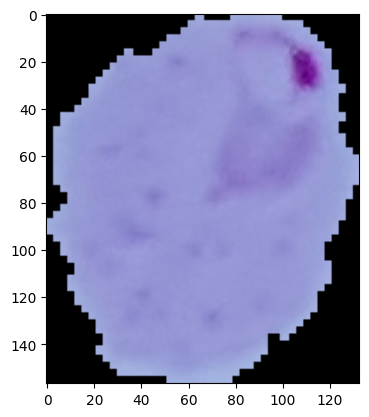

In [260]:
plt.imshow(para_cell)

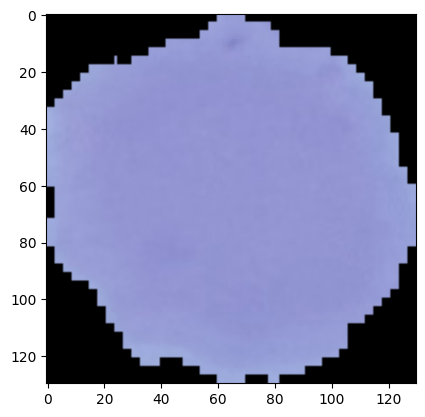

In [263]:
plt.imshow(train_uninfected[80])

In [264]:
len(train_parasited)

11024

In [265]:
len(train_uninfected)

11024

In [261]:
para_cell.shape

(157, 133, 3)

In [266]:
dim1 = []
dim2 = []
for image in train_uninfected:
    d1,d2,colors = image.shape
    dim1.append(d1)
    print(d1)
    dim2.append(d2)

139
136
142
112
139
118
130
118
136
148
133
121
139
163
193
139
148
172
160
118
154
187
130
109
130
142
124
136
163
127
133
130
145
118
157
175
157
136
172
172
136
151
163
142
148
136
139
169
127
139
145
151
103
115
136
100
154
124
160
106
139
136
145
139
82
115
130
127
115
178
169
121
103
136
130
175
148
100
124
127
130
130
121
130
166
139
130
124
124
136
166
148
118
133
154
88
112
136
148
151
142
94
136
154
139
139
172
127
148
136
139
166
139
139
184
136
139
175
124
151
151
145
130
127
133
121
136
112
160
163
130
145
172
151
151
124
160
160
118
118
142
148
181
136
130
139
130
163
148
139
154
163
142
145
157
136
115
151
106
163
142
166
178
163
139
163
112
160
112
196
130
148
112
124
145
160
142
175
130
151
178
136
127
127
151
136
166
148
139
148
142
169
166
151
169
148
148
133
166
169
166
184
172
109
178
190
148
145
142
163
190
169
151
94
160
133
127
151
103
184
139
160
142
157
163
124
190
142
145
130
136
151
139
151
148
145
133
145
163
139
154
136
136
151
142
154
142
142
136
157
130


<Axes: >

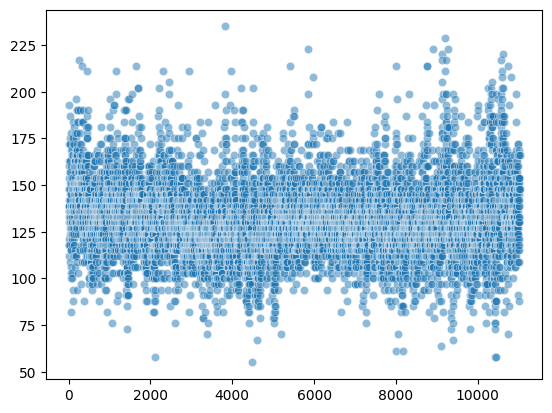

In [269]:
sns.scatterplot(dim1 ,alpha=0.5)

In [270]:
np.mean(dim1)

131.45292089985486

In [271]:
np.mean(dim2)

131.13969521044993

In [272]:
image_shape = (131,131,3)

In [273]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [275]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=

In [276]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

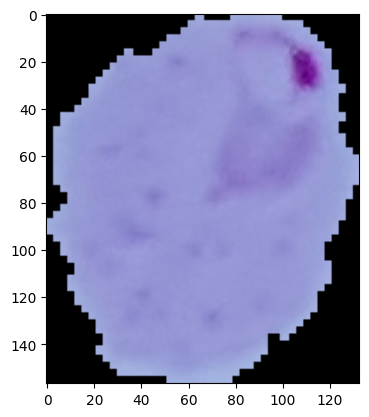

In [281]:
plt.imshow(para_cell)

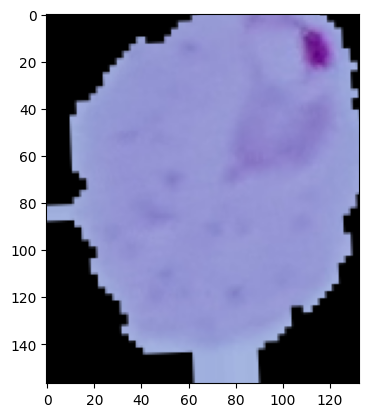

In [282]:
plt.imshow(image_gen.random_transform(para_cell))

In [283]:
image_gen.flow_from_directory(train_path)

Found 22048 images belonging to 2 classes.


In [285]:
image_gen.flow_from_directory(test_path)


Found 5510 images belonging to 2 classes.


In [286]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [302]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(132,132,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(132,132,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(132,132,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [288]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 130, 130, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 65, 65, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [289]:
from tensorflow.keras.callbacks import EarlyStopping

In [290]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [292]:
batch_size = 16

In [296]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 22048 images belonging to 2 classes.


In [297]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 5510 images belonging to 2 classes.


In [298]:
train_image_gen.class_indices

{'parasited': 0, 'uninfected': 1}

In [299]:
test_image_gen.class_indices

{'parasited': 0, 'uninfected': 1}

In [300]:
import warnings
warnings.filterwarnings('ignore')

In [304]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 351s 253ms/step - accuracy: 0.5299 - loss: 0.6918 - val_accuracy: 0.7922 - val_loss: 0.4666
Epoch 2/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 327s 236ms/step - accuracy: 0.8746 - loss: 0.3410 - val_accuracy: 0.9270 - val_loss: 0.2239
Epoch 3/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 342s 248ms/step - accuracy: 0.9415 - loss: 0.1948 - val_accuracy: 0.9405 - val_loss: 0.1842
Epoch 4/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 324s 234ms/step - accuracy: 0.9419 - loss: 0.1809 - val_accuracy: 0.9485 - val_loss: 0.1635
Epoch 5/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 345s 250ms/step - accuracy: 0.9517 - loss: 0.1581 - val_accuracy: 0.9327 - val_loss: 0.2038
Epoch 6/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 375s 271ms/step - accuracy: 0.9464 - loss: 0.1689 - val_accuracy: 0.9490 - val_loss: 0.1592
Epoch 7/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 372s 269ms/step - accuracy: 0.9511 - loss: 0.1545 - val_accuracy: 0.9477 - val_loss: 0.1598
Epoch 8/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 349s 253ms/step - ac

In [306]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.keras')

In [309]:
losses = pd.DataFrame(model.history.history)

<Axes: >

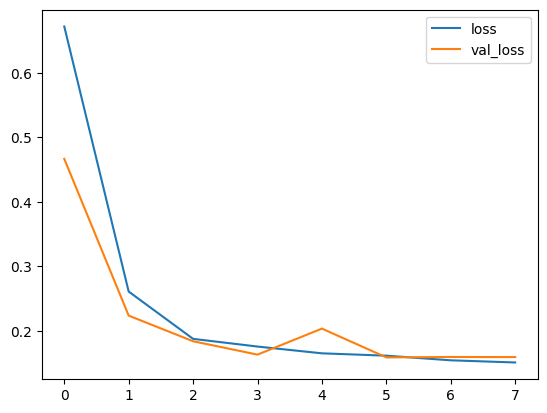

In [310]:
losses[['loss','val_loss']].plot()

In [311]:
model.metrics_names

['loss', 'compile_metrics']

In [313]:
model.evaluate(test_image_gen)

345/345 ━━━━━━━━━━━━━━━━━━━━ 50s 144ms/step - accuracy: 0.9506 - loss: 0.1364


[0.16438941657543182, 0.9426497220993042]

In [315]:

pred_probabilities = model.predict(test_image_gen)

345/345 ━━━━━━━━━━━━━━━━━━━━ 47s 136ms/step


In [319]:
pred_probabilities.min()

3.807978e-28

In [316]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [320]:
predictions = pred_probabilities > 0.5

In [321]:
predictions

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [322]:
from sklearn.metrics import classification_report,confusion_matrix

In [323]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2755
           1       0.95      0.93      0.94      2755

    accuracy                           0.94      5510
   macro avg       0.94      0.94      0.94      5510
weighted avg       0.94      0.94      0.94      5510



In [324]:
confusion_matrix(test_image_gen.classes,predictions)

array([[2623,  132],
       [ 190, 2565]], dtype=int64)

In [347]:
test_image= "./Splitted Data/testData/uninfected/C100P61ThinF_IMG_20150918_144823_cell_142.png"

In [348]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(test_image,target_size=image_shape)

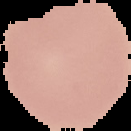

In [349]:
my_image

In [350]:
type(my_image)

PIL.Image.Image

In [351]:
my_image = image.img_to_array(my_image)

In [352]:
type(my_image)

numpy.ndarray

In [353]:
my_image.shape

(131, 131, 3)

In [354]:
my_image = np.expand_dims(my_image, axis=0)

In [355]:
my_image.shape

(1, 131, 131, 3)

In [356]:
model.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[1.]], dtype=float32)

In [358]:
train_image_gen.class_indices

{'parasited': 0, 'uninfected': 1}

In [359]:
test_image_gen.class_indices

{'parasited': 0, 'uninfected': 1}